# 1. EDA grayscale

<copyright>
Copyright ©︎ , 2020 吉延石油株式会社, All rights reserved.
</copyright>

In [ ]:
!git clone https://github.com/yoshinobu-sekiyu/Gas-station-nationality-classification.git

Cloning into 'GStation-nationality-prediction'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 38 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [1]:
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

### Postprocessing using PIL.ImageFilter

In [3]:
# When using deep learning architecture, post-processing affects classification accuracy. Handling raw image here...
!python ../pythonfile/Effects.py

In [2]:
p = Path("../datasets/raw")

paths = list(p.glob("**/0.png"))
paths[0]

PosixPath('../datasets/raw/0.png')

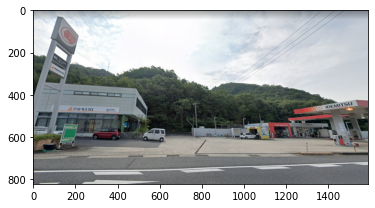

In [3]:
img = imread(paths[0])
plt.imshow(img)
plt.show()

/root/.local/share/virtualenvs/base-Jcn5akDl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


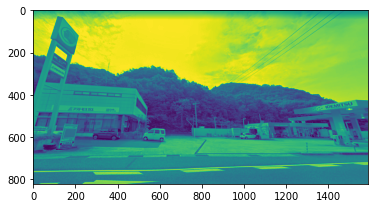

In [20]:
grayscale = rgb2gray(img)
plt.imshow(grayscale)
plt.show()

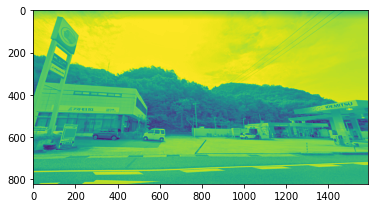

In [21]:
# Grayscaled image can be expressed as g(pixel) = psi(pixel)^2 where psi ranges from 0 to 1.

grayPsi = np.sqrt(grayscale)

plt.imshow(grayPsi)
plt.show()

In [ ]:
# grayPsi variable enhances the positive semidefinite value.
# Normal distributed filter (0 < val < 1) is good for convolution?

grayPsi, grayscale

(array([[0.73112216, 0.72380314, 0.72089296, ..., 0.69596681, 0.69596681,
         0.69596681],
        [0.73931526, 0.73627441, 0.73245411, ..., 0.69877849, 0.69877849,
         0.69877849],
        [0.74984887, 0.74516007, 0.74571902, ..., 0.70436816, 0.70436816,
         0.70436816],
        ...,
        [0.64364556, 0.60598745, 0.57952415, ..., 0.6438944 , 0.64084197,
         0.64693243],
        [0.61879484, 0.61242463, 0.61902327, ..., 0.64084197, 0.63469307,
         0.63469307],
        [0.63156637, 0.66505344, 0.65014478, ..., 0.63777493, 0.63469307,
         0.62848401]]),
 array([[0.53453961, 0.52389098, 0.51968667, ..., 0.4843698 , 0.4843698 ,
         0.4843698 ],
        [0.54658706, 0.5421    , 0.53648902, ..., 0.48829137, 0.48829137,
         0.48829137],
        [0.56227333, 0.55526353, 0.55609686, ..., 0.49613451, 0.49613451,
         0.49613451],
        ...,
        [0.41427961, 0.36722078, 0.33584824, ..., 0.4146    , 0.41067843,
         0.41852157],
        [0.3

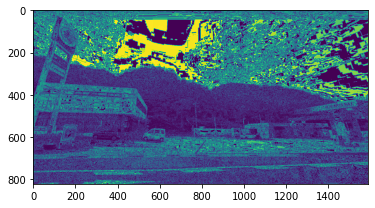

In [ ]:
# Removing the values that producing errors when computation.
# This only remove the noise around squaring... Up-sampling work?

Computationally_denoised = grayscale * (grayscale == np.square(grayPsi))
plt.imshow(Computationally_denoised)
plt.show()

In [ ]:
denoised_grayPsi = np.sqrt(Computationally_denoised)
Computationally_denoised == np.square(denoised_grayPsi)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

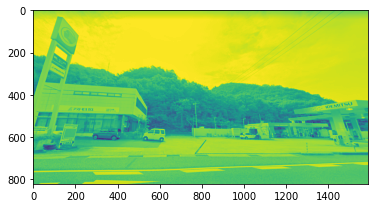

In [ ]:
grayTert = np.cbrt(grayscale)
plt.imshow(grayTert)
plt.show()

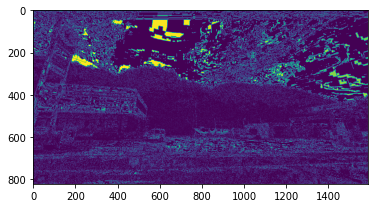

In [ ]:
# When multiplying task succeeds, backpropagation is needed.

Computationally_denoised2 = grayscale * (grayscale == np.power(grayTert, 3))
plt.imshow(Computationally_denoised2)
plt.show()

In [ ]:
mask = (Computationally_denoised == grayscale)
counter = np.ones(mask.shape)
count = (mask * counter).sum()

preserved_inforatio = count/counter.sum()
preserved_inforatio

0.5153513134658174

In [ ]:
# Precision loss of data analysis

mask2 = (Computationally_denoised2 == grayscale)
counter2 = np.ones(mask2.shape)
count2 = (mask2 * counter2).sum()

preserved_inforatio2 = count2/counter2.sum()
preserved_inforatio2

0.1680472621208272

In [ ]:
# Listing preserved information ratio.

for i in range(2, 10, 1):
    grayRoots = np.power(grayscale, 1/i)
    Computationally_denoised_N = grayscale * (grayscale == np.power(grayRoots, i))
    mask = (Computationally_denoised_N == grayscale)
    counter = np.ones(mask.shape)
    count = (mask * counter).sum()
    preserved_inforatio = count/counter.sum()
    print(preserved_inforatio)

0.5153513134658174
0.3605718465649112
0.28569373582549557
0.2305482185651193
0.19267378975365054
0.17993548209383253
0.14004945964723273
0.13547153468755643


In [ ]:
# Preservation pattern analysis

preserved = [
0.576934554973822,
0.3690471204188482,
0.3075602094240838,
0.2543062827225131,
0.21004712041884815,
0.16895287958115182,
0.15825916230366494,
0.1426910994764398]

for i in range(len(preserved) -1):
    print(preserved[i + 1]/preserved[i])

0.6396689489947321
0.8333900805810919
0.8268504017431567
0.8259611920325286
0.8043570378125078
0.9367059188100404
0.9016293110578115
